In [ ]:
! git clone https://github.com/satyam98/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network.git

Cloning into 'Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (275/275), done.
remote: Total 278 (delta 13), reused 259 (delta 2), pack-reused 0
Receiving objects: 100% (278/278), 21.80 MiB | 17.07 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.cluster import KMeans
import numpy as np
import cv2


classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

############################################################
def myFunc(img):
    p=1;
    kernel = np.ones((7,7),np.float32)/25
    img1 = cv2.filter2D(img,-1,kernel)
    #cv2.imshow('Gaussian Image',img1)

    ## Bilateral Filter for Edge Enhancement
    img3 = cv2.bilateralFilter(img1,9,75,75)
    #cv2.imshow('Bilateral Filtered Image',img3)


    ## RGB to Gray conversion
    GRAY_Img = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
    #cv2.imshow('GRAY Image',GRAY_Img)

    Data2Ext=GRAY_Img;
    #cv2.imwrite('ImageRedist.jpg',Data2Ext);


    roi1=GRAY_Img;
    r,c=roi1.shape;
    if p==1:
        roi = roi1.reshape((roi1.shape[0] * roi1.shape[1], 1))

    ## KMEANS clustering
    imgkmeans = KMeans(n_clusters=3, random_state=0);
    imgkmeans.fit(roi);
    label_values=imgkmeans.labels_;
    Label_reshped = np.reshape(label_values,(roi1.shape[0] ,roi1.shape[1]));


    segmentregions=roi1;

    rows,cols = roi1.shape;
    # Thresholding for segmentation
    for i in range(0,rows):
        for j in range(0,cols):
            pixl=Label_reshped[i,j];
            if pixl==0:
                segmentregions[i,j]=255;

            else:
                segmentregions[i,j]=0;


    # Thresholding for segmentation
    NewImage = Data2Ext;
    NewImage= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);
    extractedregions=NewImage;

    for k in range(0,rows):
        for l in range(0,cols):
            pixl1=segmentregions[k,l];
            if pixl1==0:
                extractedregions[k,l]=NewImage[k,l];
            else:
                extractedregions[k,l]=0;

    img=cv2.cvtColor(extractedregions,cv2.COLOR_GRAY2RGB)
    return img
#########################################################
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        preprocessing_function=myFunc)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=myFunc)

print('Loading training set:');
training_set = train_datagen.flow_from_directory(
        '/content/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network/Dataset/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

print('Loading testing set:');
test_set = test_datagen.flow_from_directory(
        '/content/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network/Dataset/test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

classifier.fit_generator(
        training_set,
        steps_per_epoch=210,
        epochs=50,
        validation_data=test_set,
        validation_steps=54)

classifier.save('model.h5')
print('model.h5')

Loading training set:
Found 210 images belonging to 2 classes.
Loading testing set:
Found 54 images belonging to 2 classes.


<ipython-input-2-a1cc764561c8>:113: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The defau

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

  1/210 [..............................] - ETA: 26:55 - loss: 0.6929 - accuracy: 0.4375

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

  2/210 [..............................] - ETA: 18:32 - loss: 0.7285 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

  3/210 [..............................] - ETA: 15:32 - loss: 0.7553 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

  4/210 [..............................] - ETA: 11:38 - loss: 0.7368 - accuracy: 0.5702

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

  5/210 [..............................] - ETA: 10:26 - loss: 0.7201 - accuracy: 0.5890

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

  6/210 [..............................] - ETA: 9:41 - loss: 0.7121 - accuracy: 0.6067 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

  7/210 [>.............................] - ETA: 9:06 - loss: 0.7097 - accuracy: 0.5857

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

210/210 [==============================] - 32s 117ms/step - loss: 0.7097 - accuracy: 0.5857 - val_loss: 0.6696 - val_accuracy: 0.7037
model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


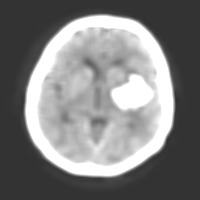

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Load the image
img = cv2.imread('/content/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network/Dataset/test/abnormal/16.jpg')

# Check if the image is loaded successfully
if img is None:
    print("Error: Unable to load image.")
else:
    # Define the kernel
    kernel = np.ones((7,7), np.float32) / 25

    # Apply the filter
    img1 = cv2.filter2D(img, -1, kernel)

    # Display the filtered image
    cv2_imshow(img1)


In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# RGB to Gray conversion
GRAY_Img = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
cv2_imshow(GRAY_Img)


NameError: name 'img3' is not defined

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create an ImageDataGenerator for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess training and testing data
train_generator = train_datagen.flow_from_directory(
        '/content/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network/Dataset/train',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        '/content/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network/Dataset/test',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

# Define the CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=10,
        validation_data=test_generator,
        validation_steps=test_generator.samples // batch_size)

Found 210 images belonging to 2 classes.
Found 54 images belonging to 2 classes.
Epoch 1/10
6/6 [==============================] - 17s 2s/step - loss: 0.6911 - accuracy: 0.6461 - val_loss: 0.7417 - val_accuracy: 0.4375
Epoch 2/10
6/6 [==============================] - 9s 2s/step - loss: 0.5935 - accuracy: 0.6517 - val_loss: 0.6437 - val_accuracy: 0.6250
Epoch 3/10
6/6 [==============================] - 10s 2s/step - loss: 0.5408 - accuracy: 0.7303 - val_loss: 0.6404 - val_accuracy: 0.7500
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 0.5545 - accuracy: 0.7640 - val_loss: 0.5703 - val_accuracy: 0.7500
Epoch 5/10
6/6 [==============================] - 8s 1s/step - loss: 0.5013 - accuracy: 0.7978 - val_loss: 0.5689 - val_accuracy: 0.7812
Epoch 6/10
6/6 [==============================] - 9s 2s/step - loss: 0.4656 - accuracy: 0.7865 - val_loss: 0.5280 - val_accuracy: 0.7812
Epoch 7/10
6/6 [==============================] - 15s 3s/step - loss: 0.4943 - accuracy: 0.7809

In [ ]:
# Make predictions
# Assuming you have a test image 'test_image.jpg'
test_img = cv2.imread('/content/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network/Dataset/test/normal/1.jpg')
test_img = cv2.resize(test_img, (img_width, img_height))
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img / 255.0  # Normalize the image
predicted_stage = model.predict(test_img)

# Print the predicted stage
if predicted_stage >= 0.5:
    print("No")
else:
    print("Yes")

1/1 [==============================] - 0s 156ms/step
Yes


1/1 [==============================] - 0s 78ms/step


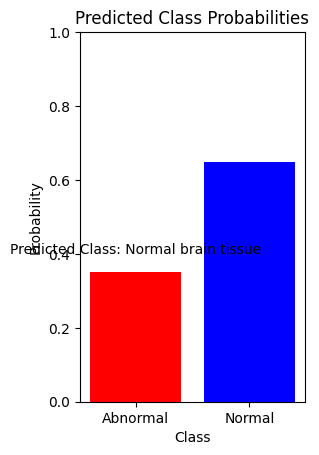

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pre-trained model (assuming 'model' variable contains the trained model)
from tensorflow.keras.models import load_model
model = load_model('model.h5')

# Define the image dimensions expected by the model
img_width, img_height = 64, 64

# Load the test image
test_img_path = '/content/Brain-Tumor-Segmentation-using-K-Means-Clustering-and-Detection-using-Convolutional-Neural-Network/Dataset/test/abnormal/16.jpg'
test_img = cv2.imread(test_img_path)

# Check if the image is loaded successfully
if test_img is None:
    print("Error: Unable to load image.")
else:
    # Preprocess the image
    test_img = cv2.resize(test_img, (img_width, img_height))
    test_img_norm = test_img / 255.0  # Normalize the image
    test_img_expanded = np.expand_dims(test_img_norm, axis=0)

    # Predict the class probabilities
    predicted_prob = model.predict(test_img_expanded)[0][0]  # Extract scalar value from array

    # Threshold the predicted probabilities to classify as normal or abnormal
    predicted_class = "Abnormal tumor" if predicted_prob >= 0.5 else "Normal brain tissue"



    # Plot the predicted class probabilities
    plt.subplot(1, 2, 2)
    plt.bar(["Abnormal", "Normal"], [predicted_prob, 1 - predicted_prob], color=['red', 'blue'])
    plt.title("Predicted Class Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.ylim(0, 1)

    # Add text annotation for the predicted class
    plt.text(0, predicted_prob + 0.05, f"Predicted Class: {predicted_class}", ha='center')

    plt.show()
